<a href="https://colab.research.google.com/github/dhar9571/Capstone-Project-Unsupervised-ML---Netflix-Dataset/blob/main/Capstone_Project_Unsupervised_ML_Netflix_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

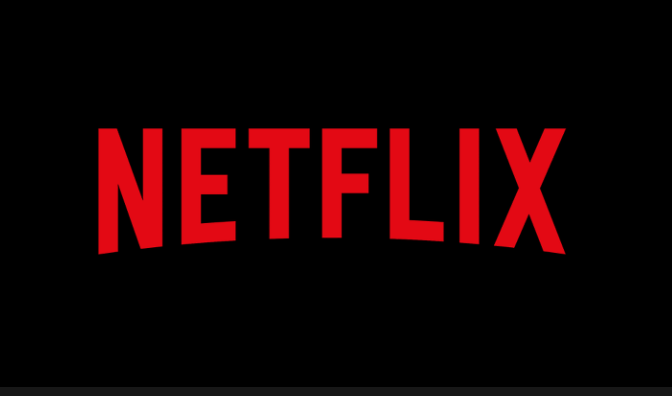

# **Project Summary -**

**Objective**:
The objective of this project is to apply machine learning clustering techniques to the Netflix Movies and Shows dataset in order to group similar movies and TV shows together. By doing so, we aim to uncover patterns and similarities among the content available on Netflix, which can help in content recommendation systems and content categorization.

**Dataset**:
The dataset used in this project is sourced from Netflix and contains information about various movies and TV shows available on the platform. The dataset includes features such as title, director, cast, description, genre, release year, country, and ratings.

**Methodology**:

**Data Preprocessing**:

**Handle missing values**: Check for and handle missing values in the dataset.
Feature selection: Decide which features are relevant for clustering (e.g., genre, release year, country, etc.).
Feature engineering: Convert categorical features into numerical representations (e.g., one-hot encoding) and normalize numerical features.

**Dimensionality Reduction** (Optional):

If the dataset has a large number of features, perform dimensionality reduction techniques (e.g., Principal Component Analysis) to reduce the feature space and improve clustering performance.

**Clustering Algorithm Selection**:

Select appropriate clustering algorithms for the task. Common choices include K-Means, Hierarchical Clustering, and DBSCAN.

**Clustering**:

Apply the chosen clustering algorithm(s) to the preprocessed dataset to group similar movies and TV shows together.
Experiment with different values of hyperparameters (e.g., number of clusters for K-Means) and evaluate the results using internal clustering metrics like Silhouette Score, Davies-Bouldin index, etc.

**Interpretation and Visualization**:

Visualize the clustered data to gain insights into the grouping patterns and identify any interesting clusters.
Analyze the characteristics of each cluster and give meaningful names to the clusters if possible.

**Evaluation**:

Assess the quality of the clustering results. This can be done through visual inspection and, if available, by comparing the clusters with existing metadata (e.g., genre, release year, etc.).
If ground truth labels are available, external evaluation metrics like Adjusted Rand Index or Normalized Mutual Information can be used.

**Recommendations**:

Based on the clustering results, build a content recommendation system that suggests similar movies or TV shows to users based on their viewing history or preferences.

**Deployment**
Deploy the clustering model and the recommendation system in a user-friendly interface (web application, mobile app, etc.).

# **GitHub Link -**

https://github.com/dhar9571/Clustering-Project-Unsupervised---Netflix-Movies-and-TV-Shows-DatasetML.git

# **Problem Statement**


Netflix, the world's leading streaming entertainment service, hosts an extensive library of movies and TV shows catering to a diverse audience. With such a vast collection, it becomes challenging for users to discover content that aligns with their preferences. To enhance user experience and improve content recommendation, the goal of this project is to perform clustering analysis on the Netflix Movies and Shows dataset.

The Netflix Movies and Shows dataset contains a wealth of information about the content available on the platform. Each entry in the dataset represents a movie or a TV show and includes features such as title, director, cast, description, genre, release year, country, and ratings. The objective is to apply machine learning clustering techniques to group similar movies and TV shows together.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [129]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [130]:
# Download necessary NLTK resources

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Dataset Loading

In [131]:
# mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
# Loading dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Project Unsupervised ML - Netflix Dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [133]:
# Dataset First Look

# setting up to show all features

pd.set_option('display.max_columns',None)

df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [134]:
# Dataset Rows & Columns count

print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 7787
Number of columns: 12


### Dataset Information

In [135]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [136]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [137]:
# Missing Values/Null Values Count

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Missing Values Heatmap')

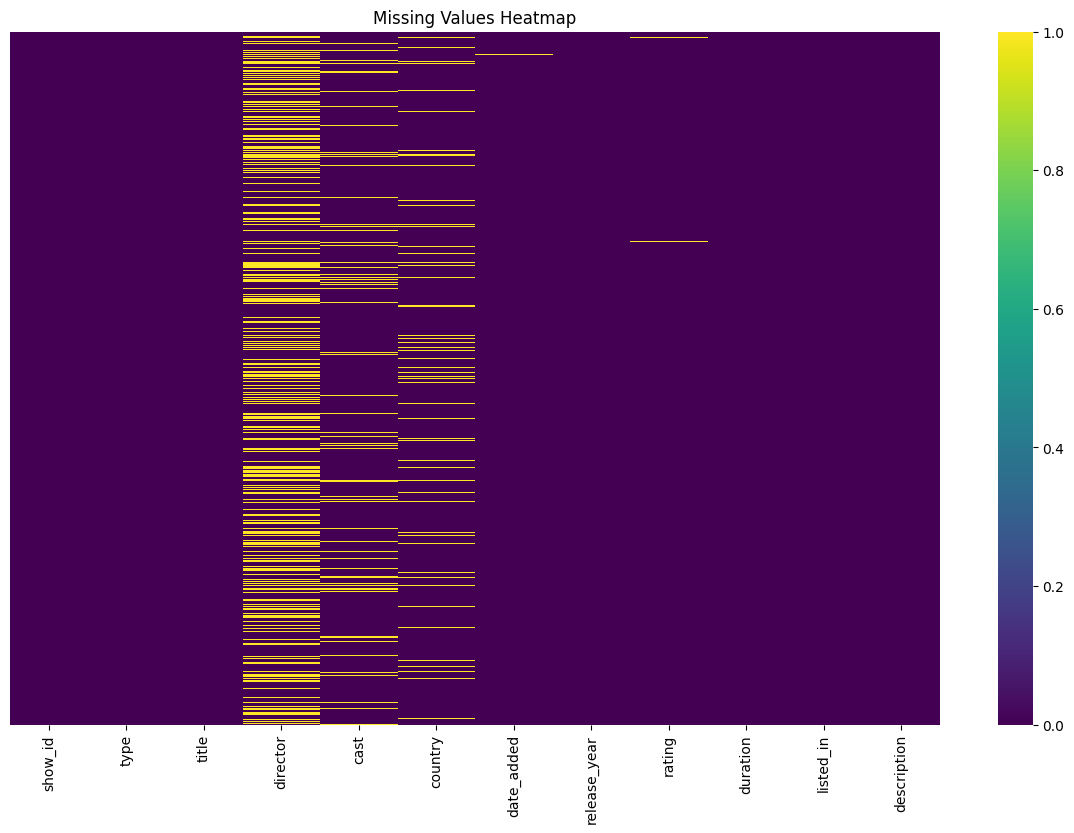

In [138]:
# Visualizing the missing values

# setting up plot size

plt.figure(figsize=(15, 9))

sns.heatmap(df.isna(),yticklabels=False,cbar=True,cmap='viridis')
plt.title("Missing Values Heatmap")

### What did you know about your dataset?

1. The dataset has 7787 number of rows and 12 features.
2. The dataset has no duplicate values.
3. The dataset has 2389 null values in director columns, 718 null values in cast column, 507 in country column, 10 values in date_added column and 7 null values in rating column.
4. Currently the dataset has only 1 numerical feature which is release_year.

## ***2. Understanding Your Variables***

In [139]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [140]:
# Dataset Describe
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description

**show_id**: A unique identifier for each movie or TV show in the dataset.

**type**: Indicates whether the entry is a "Movie" or a "TV Show."

**title**: The title of the movie or TV show.

**director**: The director(s) of the movie or TV show. In the case of TV shows, this field may be blank or contain multiple directors.

**cast**: The main cast or actors involved in the movie or TV show. This field may contain multiple actors' names.

**country**: The country of origin for the movie or TV show.

**date_added**: The date when the movie or TV show was added to the Netflix platform.

**release_year**: The year when the movie or TV show was originally released.

**rating**: The content rating assigned to the movie or TV show (e.g., PG, TV-MA, etc.).

**duration**: The duration of the movie or TV show, typically represented in minutes for movies and seasons for TV shows.

**listed_in**: The genre(s) or category(s) in which the movie or TV show is classified.

**description**: A brief description or synopsis of the movie or TV show.

### Check Unique Values for each variable.

In [141]:
# Check Unique Values for each variable.

df.nunique().reset_index().rename(columns = {'index':'column',0:'unique_values'}).sort_values(by='unique_values',ascending=False)

column  unique_values
0        show_id           7787
2          title           7787
11   description           7769
4           cast           6831
3       director           4049
6     date_added           1565
5        country            681
10     listed_in            492
9       duration            216
7   release_year             73
8         rating             14
1           type              2

## 3. ***Data Wrangling***

### Data Wrangling Code

Write your code to make your dataset analysis ready.

In [142]:
# remove the rows where date_added is null as number of empty rows are below 5% of total observations.

df = df[~df.date_added.isna()]

In [143]:
# remove the rows where rating is null as number of empty rows are below 5% of total observations.

df = df[~df.rating.isna()]

In [144]:
# replace null values of country column with mode as it will not change the distribution of the data:

df.country.fillna(df.country.mode()[0],inplace=True)

In [145]:
# removing show_id column which has unique IDs for all the rows:

df.drop(columns=['show_id'],inplace=True, axis=1)

In [146]:
# replacing director and cast features' null values with 'unknown' as director column cannot be replaced with mode due to incorrect information:

df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)

In [147]:
# creating new dataset to keep original dataset unchanged:

df1 = df

In [148]:
# For country and listed_in (genres) features, taking  only first values as main country and regions:

df1['country'] = df1['country'].apply(lambda x: x.split(',')[0])
df1['listed_in'] = df1['listed_in'].apply(lambda x: x.split(',')[0])

In [149]:
# Creating a function to convert the 'Se' to Sea in duration feature:

def con(string):

  list1 = string.split(" ")

  if list1[-1]=='Se':
    list1[-1]='Sea'

  return " ".join(list1)

In [150]:
# applying the function to the feature:

df1.duration = df1.duration.apply(lambda x: con(x))

In [151]:
# sepearting the datasets for TV SHOW and Movies:

show = df1[df.type=='TV Show']
movies = df1[df.type=='Movie']

In [152]:
movies.duration

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5372, dtype: object

In [153]:
# removing the ' min' from duration of movies to convert values in integer:

movies.duration = movies.duration.apply(lambda x: x[:-4])

<ipython-input-153-31a56a3cdaab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.duration = movies.duration.apply(lambda x: x[:-4])


In [154]:
# changing the data type of duration for movies duration feature:
movies.duration = movies.duration.astype('int')

<ipython-input-154-998ee655a0db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.duration = movies.duration.astype('int')


In [155]:
df['is_movie'] = df['type'].apply(lambda x: 0 if x=='TV Show' else 1)

### What all manipulations have you done and insights you found?

1. Removed the rows where date_added is null as number of empty rows are below 5% of total observations.
2. Removed the rows where rating is null as number of empty rows are below 5% of total observations.
3. Replaced null values of country column with mode as it will not change the distribution of the data.
4. Removed show_id column which has unique IDs for all the rows.
5. Replaced director and cast features' null values with 'unknown' as director column cannot be replaced with mode due to incorrect information.
6. For country and listed_in (genres) features, took  only first values as main country and regions.
7. Removed the ' min' from duration of movies to convert values in integer.
8. Added a new numerical column to check the content is a movie or show (0 or 1).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Show Type - Univariate

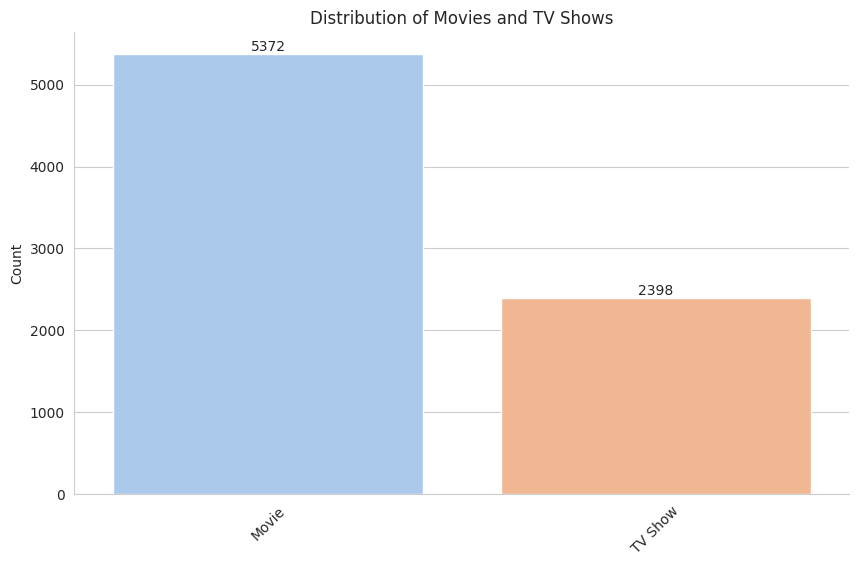

In [31]:
# Chart - 1 visualization code

# Set a visually appealing color palette
colors = sns.color_palette("pastel")

# Set the background style and increase figure size
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x=df.type.value_counts().index, y=df.type.value_counts().values, palette=colors)

# Add count values on top of each bar
for count in ax.containers:
    ax.bar_label(count, label_type='edge')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)

# Customize plot title and axis labels
plt.title('Distribution of Movies and TV Shows')
plt.ylabel('Count')

# Remove top and right spines
sns.despine()

# Show the plot
plt.show()

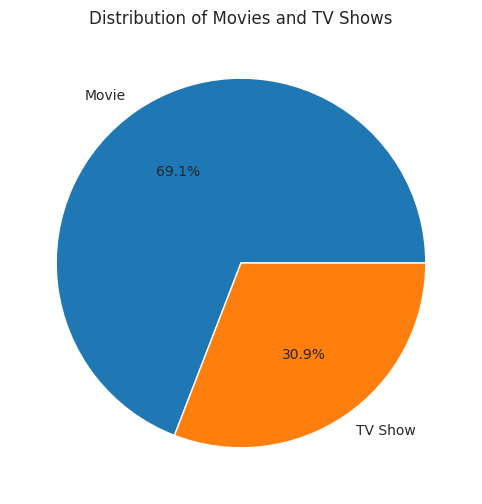

In [53]:
# Create a DataFrame of the movie and TV show counts
df_counts = df.type.value_counts().reset_index()
df_counts.columns = ['Type', 'Count']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the pie chart
plt.pie(df_counts['Count'], labels=df_counts['Type'], autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Movies and TV Shows')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

Pie charts are a simple way to visualize data, making them easy for people to understand at a glance. This makes them a good choice for communicating data to a wide audience, including people who may not be familiar with data visualization.

##### 2. What is/are the insight(s) found from the chart?

1. The dataset contains a higher number of movies (5372, 69.1%) compared to TV shows (2398, 30.9%). This indicates that movies are more prevalent in the dataset than TV shows.
2. The higher count of movies suggests that the dataset may have a more diverse range of movies available for analysis compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of movies and TV shows in the dataset can inform content strategy and investment decisions. If the dataset reflects the actual content distribution on the platform, businesses can use this insight to optimize their content acquisition and production efforts. For example, they may choose to focus more on acquiring popular movies or producing original TV shows to cater to the audience's preferences.

#### Chart - 2 - Rating count - Univairate


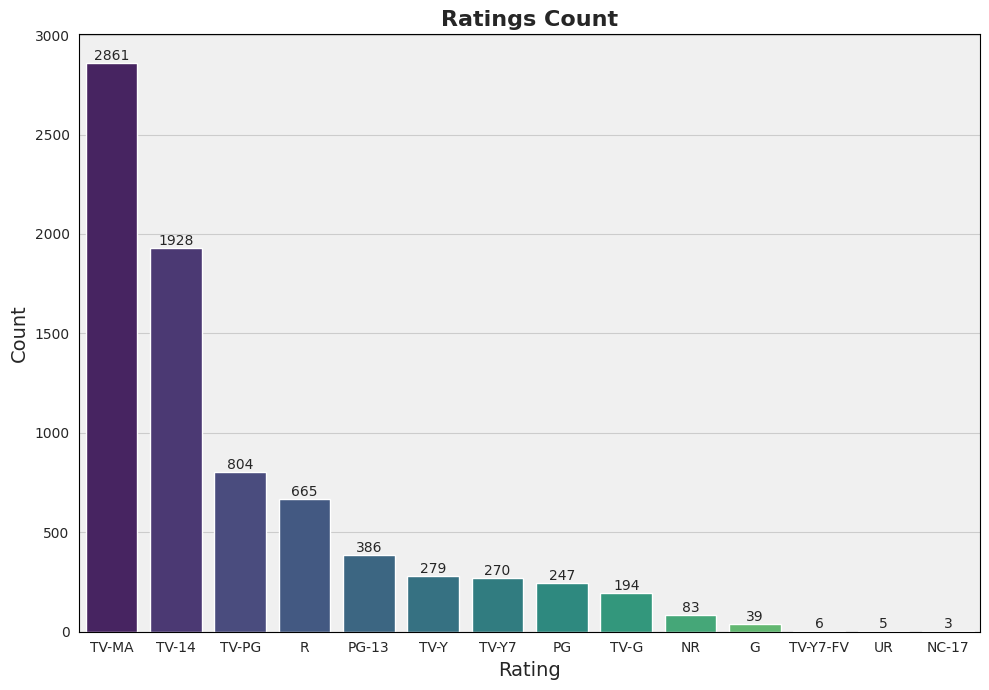

In [32]:
# Chart - 2 visualization code

# Set an color palette
colors = sns.color_palette("viridis", len(df.rating.value_counts()))

# Increase figure size and set background color
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")
plt.gca().set_facecolor('#f0f0f0')

# Create the bar plot with gradient colors
ax = sns.barplot(x=df.rating.value_counts().index, y=df.rating.value_counts().values, palette=colors)

# Add count values on top of each bar
for count in ax.containers:
    ax.bar_label(count, label_type='edge')

# Customize plot title and axis labels
plt.title('Ratings Count', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add plot border to separate bars from the background
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('black')

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

TV-MA, TV-14 and TV-PG ratings' movies have the highest counts which indiciates that movies and shows are mostly focused to these ratings.

#### Chart - 3 - Country Count - Univariate

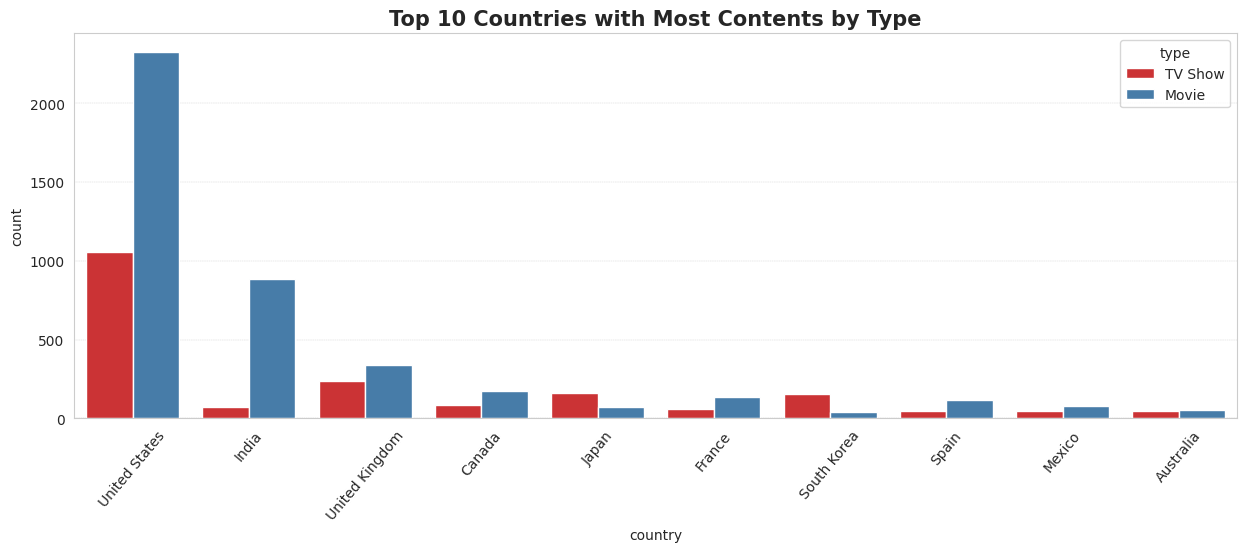

In [58]:
# Chart - 3 visualization code

plt.figure(figsize=(15,5))
plt.grid(linestyle='--', linewidth=0.3)
sns.countplot(x=df1['country'],order=df1['country'].value_counts().index[0:10],hue=df['type'],palette ="Set1")
plt.xticks(rotation=50)
plt.title('Top 10 Countries with Most Contents by Type', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

1. Most of the contents were primarily made in USA, India and United Kingdom.
2. In top content producing countries, movies count is almost double than TV Shows.

#### Chart - 4 - Release Year Count - Univariate

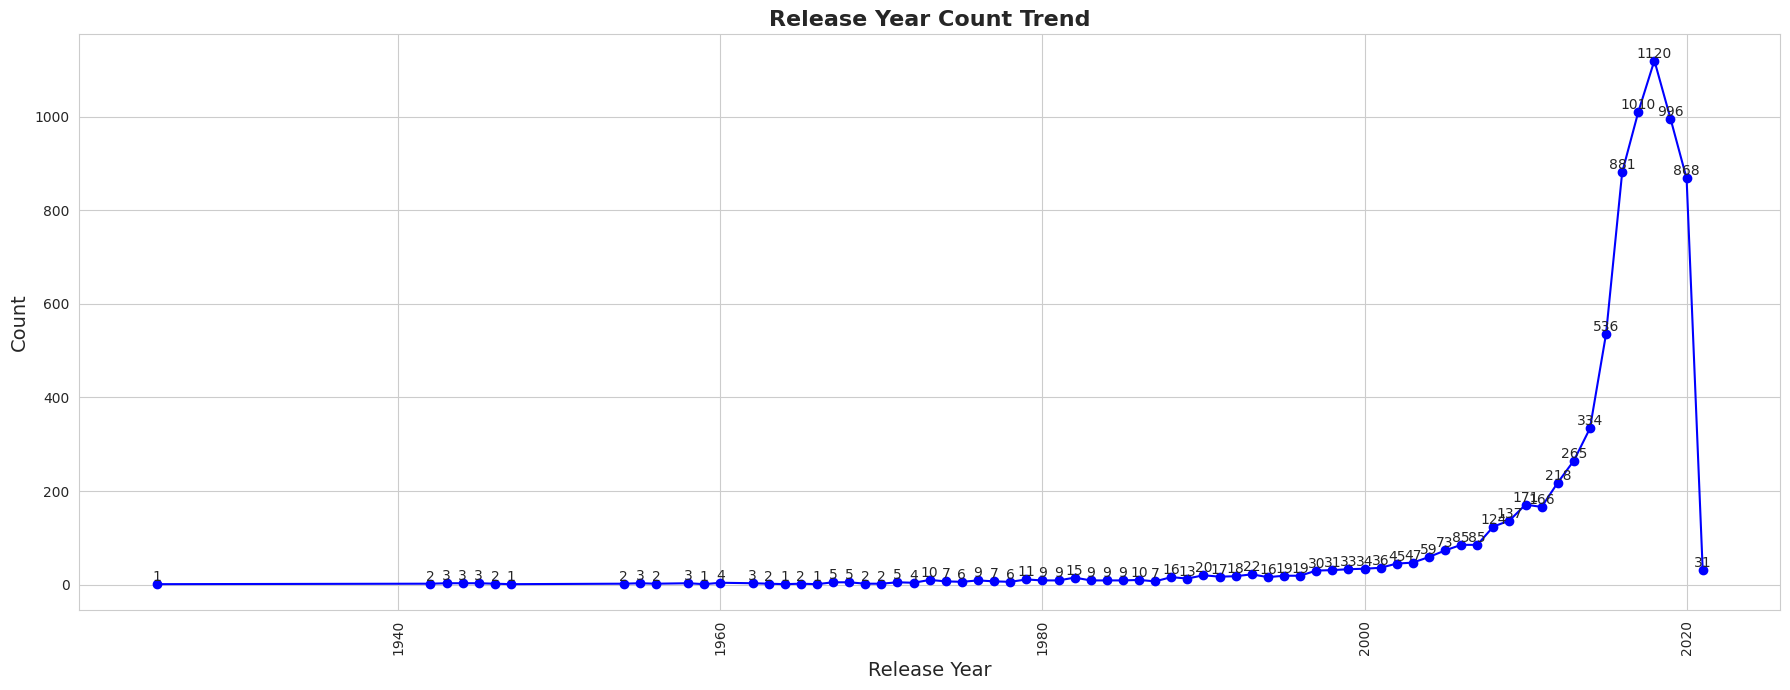

In [42]:
# Chart - 4 visualization code

# Calculate the count over the years
year_count = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(18, 7))

# Create the line plot representing the trend over years
plt.plot(year_count.index, year_count.values, marker='o', color='b', linestyle='-')

# Add count values as annotations on top of each line point
for x, y in zip(year_count.index, year_count.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)

# Customize plot title and axis labels
plt.title('Release Year Count Trend', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

If the data exhibits seasonal patterns or recurring trends over time, a line plot can help reveal these patterns. This is valuable for understanding cyclic behaviors in the data.

##### 2. What is/are the insight(s) found from the chart?

1. Most movies were released in 2017, 2018 and 2019 years.
2. Movies growth was significant in the decade of 2010.

#### Chart - 5 - Duration Distribution - Univariate

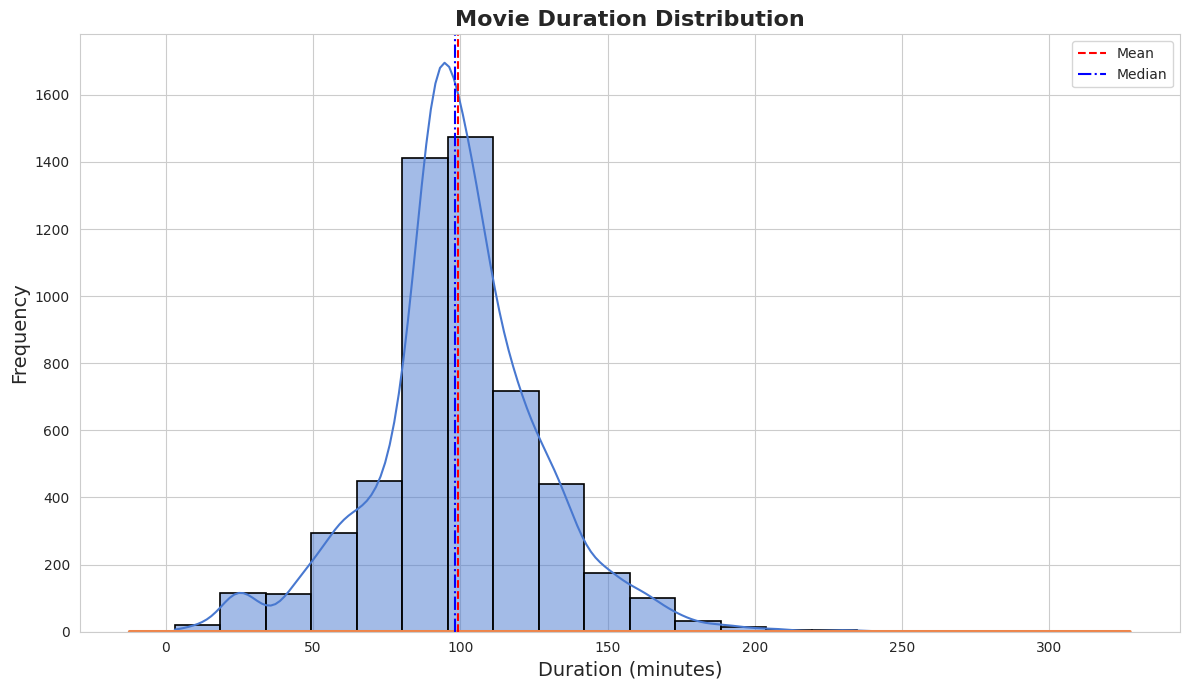

In [43]:
# Chart - 5 visualization code

# Set a visually appealing color palette
colors = sns.color_palette("muted")

# Set the background style and increase figure size
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))

# Create the histogram and KDE plot
sns.histplot(movies['duration'], kde=True, color=colors[0], bins=20, edgecolor='black', linewidth=1.2)
sns.kdeplot(movies['duration'], color=colors[1], linewidth=2.5)

# Calculate mean and median
mean_duration = movies['duration'].mean()
median_duration = movies['duration'].median()

# Add vertical lines for mean and median
plt.axvline(mean_duration, color='red', linestyle='--', label='Mean')
plt.axvline(median_duration, color='blue', linestyle='-.', label='Median')

# Customize plot title, axis labels, and legend
plt.title('Movie Duration Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histograms provide a visual representation of the distribution of a dataset. They allow you to see how data is spread across different bins or intervals, giving insights into the central tendency, spread, and shape of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Most movies are in the range from 80-130 minutes.
2. The distribution of the duration feature data is Normal.
3. Most of the movies' duration is centered arond the mean.

#### Chart - 6 - Season Wise Show - Univariate

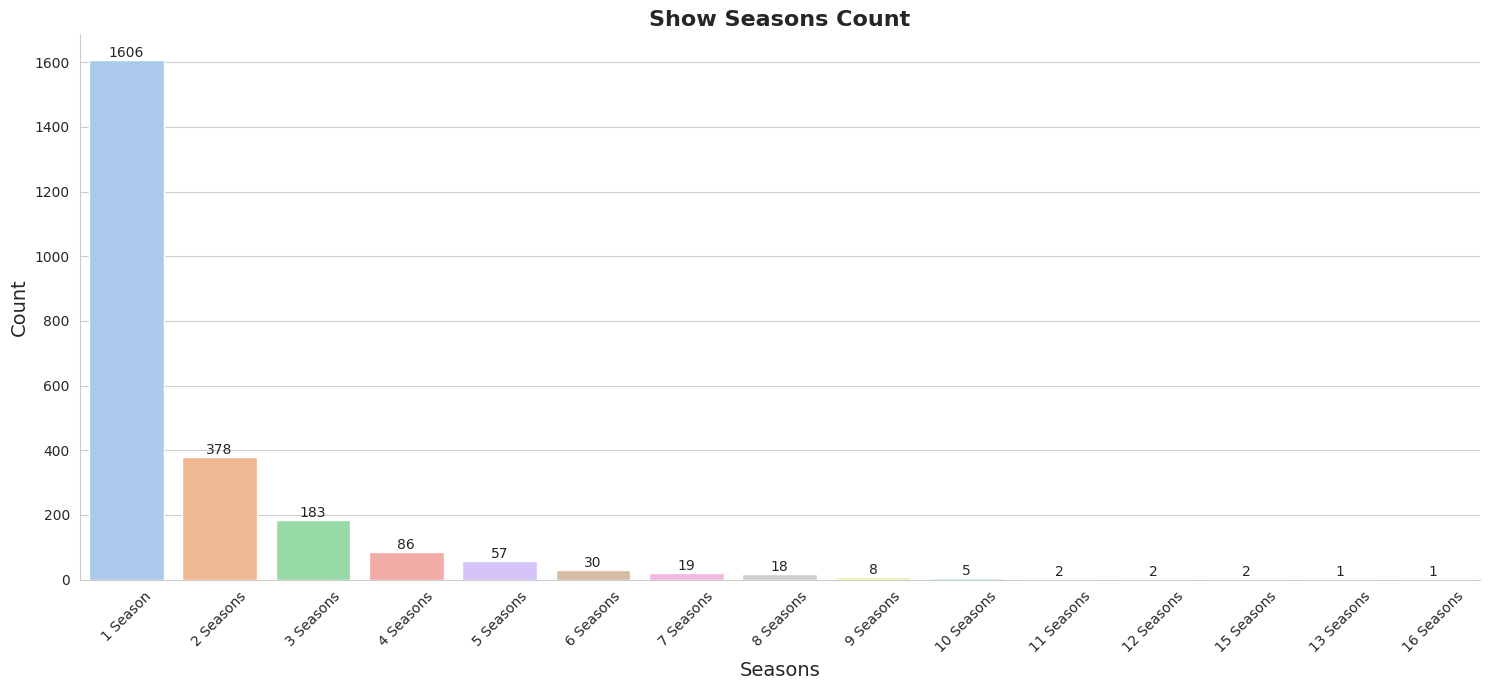

In [44]:
# Chart - 6 visualization code

# Set a visually appealing color palette
colors = sns.color_palette("pastel")

# Set the background style and increase figure size
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))

# Create the bar plot
ax = sns.barplot(x=show.duration.value_counts().index, y=show.duration.value_counts().values, palette=colors)

# Add count values on top of each bar
for count in ax.containers:
    ax.bar_label(count, label_type='edge')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)

# Customize plot title and axis labels
plt.title('Show Seasons Count', fontsize=16, fontweight='bold')
plt.xlabel('Seasons', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Remove top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

1. Most of the shows has only one season.
2. Count of Season wise shows in reducing as the number of seasons reduce.

#### Chart - 7 - Release Year vs Duration - Multivariate

<ipython-input-47-b01e22387df1>:12: UserWarning: 
The palette list has fewer values (9) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=movies.release_year, y=movies.duration, hue=movies.rating, palette=colors, s=100)


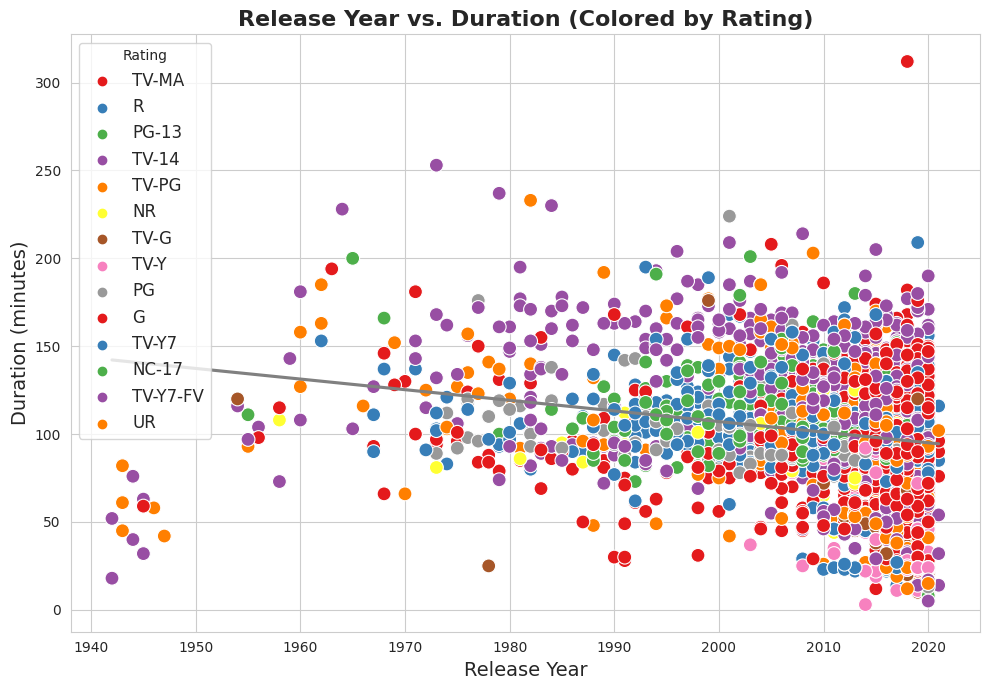

In [47]:
# Chart - 7 visualization code

import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing color palette
colors = sns.color_palette("Set1")

# Set the background style and increase figure size
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))

# Create the scatter plot with hue for movie rating
sns.scatterplot(x=movies.release_year, y=movies.duration, hue=movies.rating, palette=colors, s=100)

# Add a regression line to visualize the overall trend
sns.regplot(x=movies.release_year, y=movies.duration, scatter=False, ci=None, color='gray')

# Customize plot title and axis labels
plt.title('Release Year vs. Duration (Colored by Rating)', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14)

# Add a legend to identify movie ratings
plt.legend(title='Rating', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are used to visualize the relationship between two numerical variables. They help us understand how one variable changes concerning the other, allowing us to identify patterns, trends, correlations, or potential associations between the two variables.

##### 2. What is/are the insight(s) found from the chart?

There is no linear relationship between release year and duration which means there is no specific trend of movies duration with respect to release time.

#### Chart - 8 - Countries with Highest Average Duration - Bivariate

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Croatia'),
  Text(1, 0, 'West Germany'),
  Text(2, 0, 'Soviet Union'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Iran'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'Romania'),
  Text(7, 0, 'Somalia'),
  Text(8, 0, 'South Korea'),
  Text(9, 0, 'Bangladesh')])

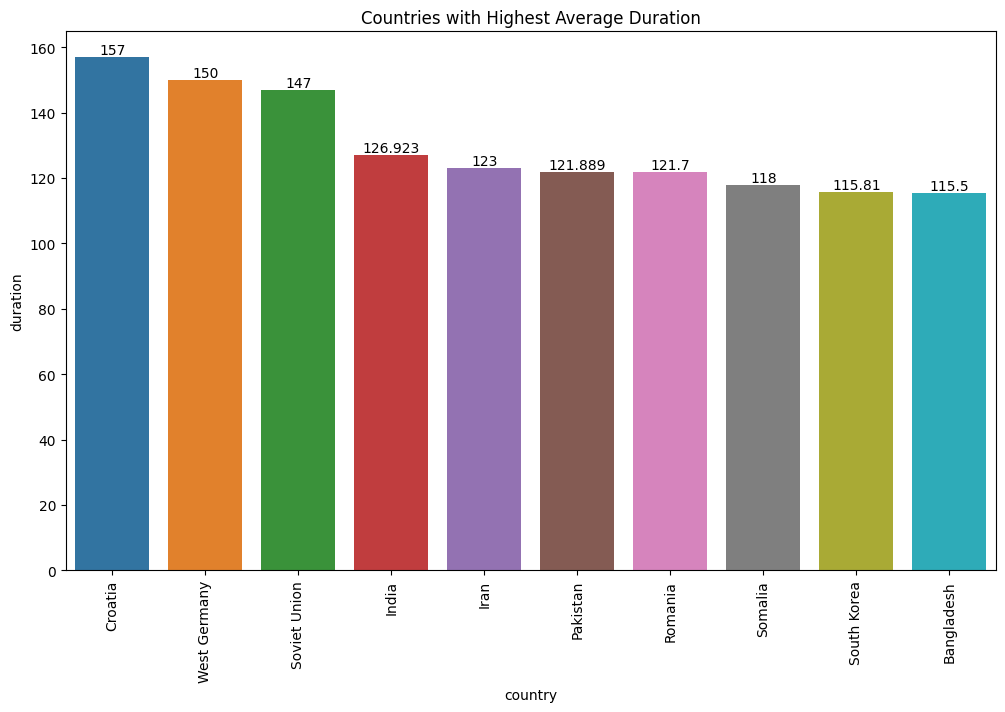

In [ ]:
# Chart - 8 visualization code

country_duration = movies.groupby('country')['duration'].mean().reset_index().sort_values(by='duration',ascending=False).head(10)

plt.figure(figsize=(12,7))

ax = sns.barplot(x=country_duration['country'],y=country_duration['duration'])

for i in ax.containers:
  ax.bar_label(i)


plt.title('Countries with Highest Average Duration')
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

1. Movies shoot in Croatia has the highest average duration.
2. After that, the outher countries are West Germany, Soviet Union, India and so on.

#### Chart - 9 - Correlation Heatmap - Multivariate

In [51]:
df1.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'is_movie'],
      dtype='object')

<ipython-input-50-67319b3325cf>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


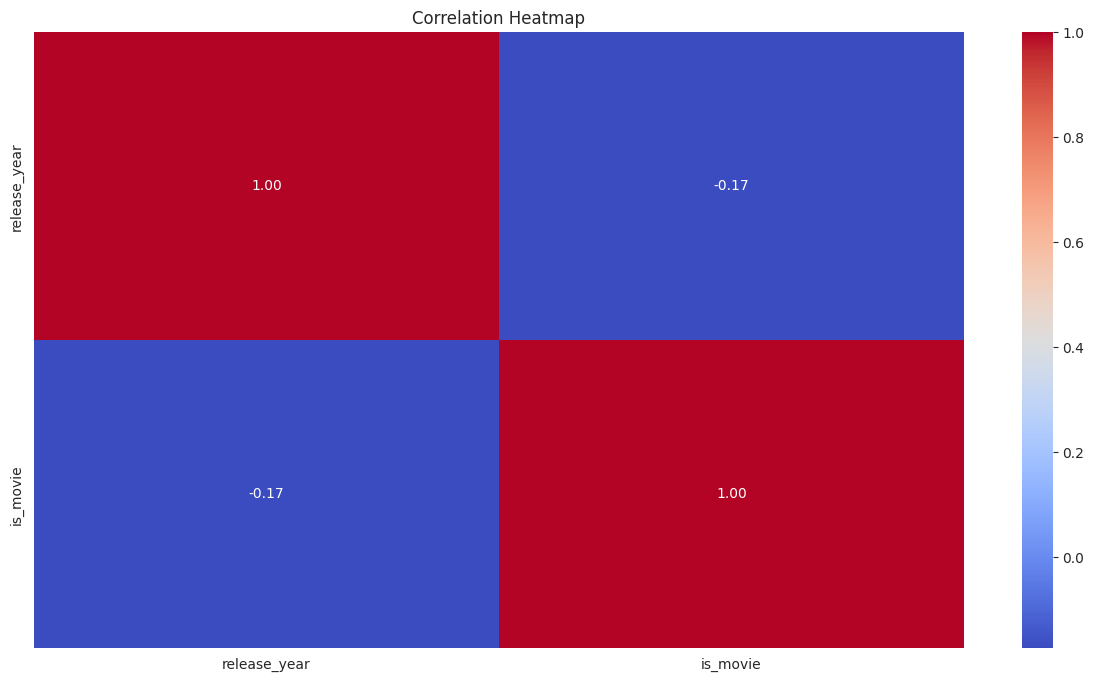

In [50]:
# Correlation Heatmap visualization code

# calculation of correlation matrix:

corr = df1.corr()

# creating plot:

plt.figure(figsize=(15, 8))  # Set the figure size (adjust as needed)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps visually represent the strength and direction of relationships between pairs of numerical variables. They help identify which variables have a positive or negative correlation, or if there is no significant correlation between the variables.

##### 2. What is/are the insight(s) found from the chart?

Release Year and Duration are the only two numerical features and are not correlated with each other.

#### Chart - 10 - Pair Plot

<Figure size 1500x800 with 0 Axes>

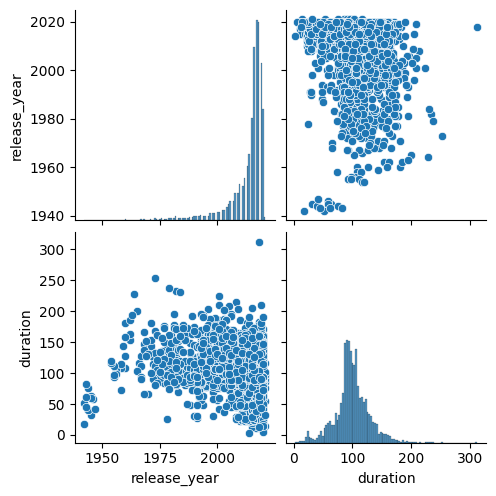

In [ ]:
# Pair Plot visualization code

plt.figure(figsize=(15,8))

sns.pairplot(movies[['type','country', 'release_year', 'rating', 'duration', 'listed_in']])
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots provide a quick and effective way to visualize relationships between multiple numerical variables in a dataset. It allows you to observe how each pair of variables interacts with one another.

##### 2. What is/are the insight(s) found from the chart?

1. Release_year feature has data which is skewed to left(negatively skewed).
2. Duration feature's data is normally distributed or centered around the mean.
3. Release_year and duration features are not correlated with each other.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant relationship between Rating (categorical) and Duration (numerical feature).

**Alternate Hypothesis**: There is a significant relationship between Rating and Duration features.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Installing library to perform required Test:
from scipy.stats import f_oneway

# Group the 'Duration' values by 'Rating' categories
rating_groups = [group['duration'] for name, group in movies.groupby('rating')]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*rating_groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Determine if the result is statistically significant at a chosen alpha level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between Rating and Duration.")
else:
    print("There is no significant relationship between Rating and Duration.")

F-statistic: 89.67685424604062
P-value: 1.7358783854542381e-217
There is a significant relationship between Rating and Duration.


##### Which statistical test have you done to obtain P-Value?

Performed One Way Anova Test.

##### Why did you choose the specific statistical test?

When we have more than two groups (categories) in your categorical variable and we want to compare the means of a numerical variable across all the groups, ANOVA is a suitable choice. It allows us to test if there is a significant difference in the means of the numerical variable between any of the groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant relationship between Type (categorical) and Release Year (numerical feature).

**Alternate Hypothesis**: There is a significant relationship between Type and Release Year.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Importing required library for T-test
from scipy.stats import ttest_ind

# creating different datasets for categories of type column with release year:

movie_years = df1[df1['type'] == 'Movie']['release_year']
tvshow_years = df1[df1['type'] == 'TV Show']['release_year']

# Perform the independent samples t-test
t_statistic, p_value = ttest_ind(movie_years, tvshow_years)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Determine if the result is statistically significant at a chosen alpha level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between Movie Type and Release Year.")
else:
    print("There is no significant relationship between Movie Type and Release Year.")


T-statistic: -15.546339713773646
P-value: 1.0790468769287327e-53
There is a significant relationship between Movie Type and Release Year.


##### Which statistical test have you done to obtain P-Value?

Performed T-Test.

##### Why did you choose the specific statistical test?

When we want to compare the means of a numerical variable between two distinct groups, such as comparing the heights of men and women or comparing the test scores of two study groups, we opt T-test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant association between "Rating" and "Listed_In" categories.

**Alternative Hypothesis**: There is a significant association between "Rating" and "Listed_In" categories.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# importing required library for Chi2 Test:
from scipy.stats import chi2_contingency

# Create a contingency table to represent the frequency of occurrences of each combination
contingency_table = pd.crosstab(df1['rating'], df1['listed_in'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Determine if the result is statistically significant at a chosen alpha level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between Rating and Listed_In.")
else:
    print("There is no significant association between Rating and Listed_In.")


Chi-square statistic: 9144.851540084619
P-value: 0.0
There is a significant association between Rating and Listed_In.


##### Which statistical test have you done to obtain P-Value?

Performed Chi-2 Test.

##### Why did you choose the specific statistical test?

The chi-square test is chosen when we want to determine if there is a significant association or relationship between two categorical variables. It is used to assess whether the observed frequency distribution of data differs significantly from the expected frequency distribution under the assumption of independence between the two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Already Handled the missing values in Data Wrangling portion.

In [156]:
# Checking null values in original dataset:

df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
is_movie        0
dtype: int64

Text(0.5, 1.0, 'Missing Values Heatmap')

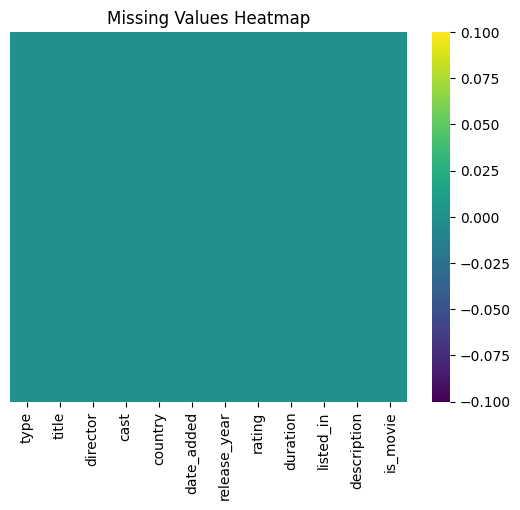

In [157]:
# plotting null values heatmap:

sns.heatmap(df.isna(),yticklabels=False,cbar=True,cmap='viridis')
plt.title("Missing Values Heatmap")

Observation: There are no null values in the dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. Removed the rows where date_added is null as number of empty rows are below 5% of total observations.
2. Removed the rows where rating is null as number of empty rows are below 5% of total observations.
3. Replaced null values of country column with mode as it will not change the distribution of the data.

### 2. Handling Outliers

<Axes: xlabel='release_year'>

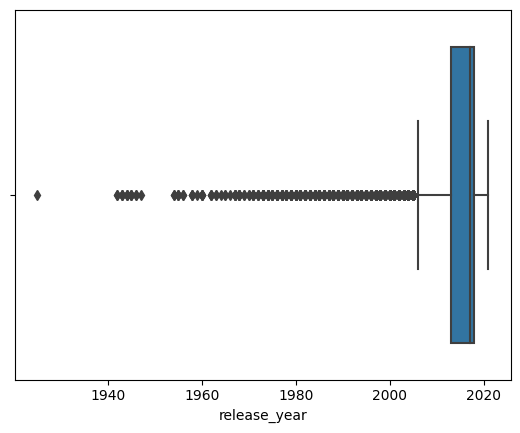

In [158]:
# Plotting boxplot for numerical features to check outliers:

sns.boxplot(x=df.release_year)

##### What all outlier treatment techniques have you used and why did you use those techniques?

The numerical data represent the actual or real time data. Therefore, removing outliers may cause loss of information. Hence, skipping this step.

### 2. Categorical Encoding

In [159]:
# Removing type feature as already converted it into is_movie feature:

df.drop(columns=['type'],axis=1,inplace=True)

In [160]:
# importing required library for label encoding:

from sklearn.preprocessing import LabelEncoder

# creating object:

le = LabelEncoder()

# fitting the encoder on feature:

df.rating = le.fit_transform(df.rating)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Used Label Encoding technique to convert rating feature values to integers. It is usable when the number of classes in a feature are more than 5.

### 3. Feature Values Handling

In [161]:
# creating two new features for duation of movie and show

df['movie_duration'] = df.apply(lambda row: row['duration'] if row['is_movie'] == 1 else 0, axis=1)
df['show_duration'] = df.apply(lambda row: row['duration'] if row['is_movie'] == 0 else 0, axis=1)

In [162]:
# Creating a function to convert string of movie_duration feature into integer:

def con_min(num):

  if num != 0:
    list1 = num.split(" ")
    return int(list1[0])
  else:
    return num


# Applying con_min function:

df.movie_duration = df.movie_duration.apply(lambda x: con_min(x))

In [163]:
# applying the function on show_duration to convert the values to integers:

df.show_duration = df.show_duration.apply(lambda x: con_min(x))

# removing duration feature as we have already extracted required information from it:

df.drop(['duration'],axis=1,inplace=True)

In [164]:
# creating a function to extract year from date_added:

def ext_year(date):

  list1 = date.split(",")

  return int(list1[-1])


# applying to function on date_added feature:

df.date_added = df.date_added.apply(lambda x: ext_year(x))

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [165]:
# Creating final_text column using all textual columns which one is used for model building purpose.

df['textual_data'] = df['description'] + ' ' + df['listed_in'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['director']

#### Lower Casing

In [166]:
# Convert all text in the 'textual_data' column to lowercase
df['textual_data'] = df['textual_data'].str.lower()

# Verify the lowercase manipulation for a specific row
print(df.iloc[544]['textual_data'])

problems big and small pop up when scott lang, aka ant-man, gets drafted by dr. hank pym and hope van dyne, aka the wasp, for an urgent rescue mission. action & adventure paul rudd, evangeline lilly, michael douglas, michael peña, hannah john-kamen, laurence fishburne, michelle pfeiffer, walton goggins, t.i., judy greer, bobby cannavale, david dastmalchian, abby ryder fortson, randall park united states peyton reed


#### Removing Punctuations

In [167]:
# Define a function to remove punctuations from the given text

def punctuations(text):
    # Importing necessary libraries
    import string

    # List all punctuation characters
    punctuation_chars = string.punctuation

    # Removing punctuations by filtering out each character
    text_without_punctuations = ''.join(char for char in text if char not in punctuation_chars)

    # Return the processed text
    return text_without_punctuations

In [168]:
# Removing Punctuations from the content_detail
df['textual_data']= df['textual_data'].apply(punctuations)

# Checking the observation after manipulation
df.iloc[544,]['textual_data']


'problems big and small pop up when scott lang aka antman gets drafted by dr hank pym and hope van dyne aka the wasp for an urgent rescue mission action  adventure paul rudd evangeline lilly michael douglas michael peña hannah johnkamen laurence fishburne michelle pfeiffer walton goggins ti judy greer bobby cannavale david dastmalchian abby ryder fortson randall park united states peyton reed'

#### Removing URLs, words and digits contain digits.

In [169]:
# importing required library:

import re

# Creating a function to remove the URL's and Numbers:

def url_numbers(text):

    # Regular expression pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'

    # Remove URLs from the text
    text_without_urls = re.sub(url_pattern, '', text)

    # Remove digits from the text
    text_without_numbers = re.sub(r'\d+', '', text_without_urls)

    # Remove punctuation and special characters, keep only alphabets and spaces
    text_without_special_chars = re.sub('[^a-zA-Z ]', ' ', text_without_numbers)

    # Remove multiple spaces with a single space
    text_cleaned = re.sub('\s+', ' ', text_without_special_chars).strip()

    # Return the processed text
    return text_cleaned

In [170]:

# Remove URLs & Remove words and digits contain digits
df['textual_data']= df['textual_data'].apply(url_numbers)

In [171]:
# Checking the observation after manipulation
df.iloc[544,]['textual_data']

'problems big and small pop up when scott lang aka antman gets drafted by dr hank pym and hope van dyne aka the wasp for an urgent rescue mission action adventure paul rudd evangeline lilly michael douglas michael pe a hannah johnkamen laurence fishburne michelle pfeiffer walton goggins ti judy greer bobby cannavale david dastmalchian abby ryder fortson randall park united states peyton reed'

#### Removing Stopwords & Removing White spaces

In [172]:
# Downloading stopwords package:
nltk.download('stopwords')

# creating a set of English stop words
sw = stopwords.words('english')

# displaying stopwords
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
# Creating a function to remove stopwords:

def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [175]:
# Importing required library:

import re
from nltk.corpus import stopwords

# Creating a function to remove stopwords and whitespace from given text:

def ss_white(text):

    # Split the text into words
    words = text.split()

    # Remove stopwords using NLTK's stopwords list for English
    stop_words = set(stopwords.words('english'))
    words_without_stopwords = [word for word in words if word.lower() not in sw]

    # Join the list of words back into a string with space separator
    text_without_stopwords = " ".join(words_without_stopwords)

    # Remove excess whitespaces
    text_cleaned = re.sub(r'\s+', ' ', text_without_stopwords).strip()

    # Return the processed text
    return text_cleaned

In [176]:
# Remove URLs & Remove words and digits contain digits
df['textual_data']= df['textual_data'].apply(ss_white)

# Checking the observation after manipulation
df.iloc[544,]['textual_data']

'problems big small pop scott lang aka antman gets drafted dr hank pym hope van dyne aka wasp urgent rescue mission action adventure paul rudd evangeline lilly michael douglas michael pe hannah johnkamen laurence fishburne michelle pfeiffer walton goggins ti judy greer bobby cannavale david dastmalchian abby ryder fortson randall park united states peyton reed'

#### Tokenization

In [177]:
# Downloading required libraries
nltk.download('punkt')

# Tokenization
df['textual_data']= df['textual_data'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df.iloc[544,]['textual_data']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['problems',
 'big',
 'small',
 'pop',
 'scott',
 'lang',
 'aka',
 'antman',
 'gets',
 'drafted',
 'dr',
 'hank',
 'pym',
 'hope',
 'van',
 'dyne',
 'aka',
 'wasp',
 'urgent',
 'rescue',
 'mission',
 'action',
 'adventure',
 'paul',
 'rudd',
 'evangeline',
 'lilly',
 'michael',
 'douglas',
 'michael',
 'pe',
 'hannah',
 'johnkamen',
 'laurence',
 'fishburne',
 'michelle',
 'pfeiffer',
 'walton',
 'goggins',
 'ti',
 'judy',
 'greer',
 'bobby',
 'cannavale',
 'david',
 'dastmalchian',
 'abby',
 'ryder',
 'fortson',
 'randall',
 'park',
 'united',
 'states',
 'peyton',
 'reed']

#### Text Normalization

In [184]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wn  = WordNetLemmatizer()

In [185]:
# Creating a function to lemmatize sentences:

def lemmatize(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wn.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [186]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df['textual_data']= df['textual_data'].apply(lemmatize)

# Checking the observation after manipulation
df.iloc[544,]['textual_data']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'problem big small pop scott lang aka antman get drafted dr hank pym hope van dyne aka wasp urgent rescue mission action adventure paul rudd evangeline lilly michael douglas michael pe hannah johnkamen laurence fishburne michelle pfeiffer walton goggins ti judy greer bobby cannavale david dastmalchian abby ryder fortson randall park united state peyton reed'

##### Which text normalization technique have you used and why?

In this project, I opted for Lemmatization over Stemming for the following reasons:


**Enhanced Base Word Accuracy:** Lemmatization provides a more precise base form of words by considering their meaning and context, in contrast to Stemming, which simply removes word suffixes.

**Handling Various Inflections:** Lemmatization is capable of handling diverse inflections, encompassing plural forms, verb tenses, and comparative forms, making it highly suitable for natural language processing tasks.

**Generating Real Words:** The output of Lemmatization consistently yields real words found in standard dictionaries, facilitating the interpretation of text analysis results.

**Improved Text Comprehension:** Lemmatization simplifies sentence comprehension by reducing words to their base forms, aiding in better understanding the context and meaning of the text.

**Multi-Language Support:** Unlike Stemming, which may be limited to English, Lemmatization proves effective for a wide range of languages, making it a versatile text processing technique.

#### Part of speech tagging

In [187]:
# tokenize the text into words before POS Taging
df['pos'] = df['textual_data'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df.head()

title           director  \
0     3%            unknown   
1   7:19  Jorge Michel Grau   
2  23:59       Gilbert Chan   
3      9        Shane Acker   
4     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   date_added  release_year  rating               listed_in  \
0        2020          2020       8  International TV Shows   
1        2016          2016       8                  Dramas   
2        2018          2011       5           Horror Movies   
3        2017          2009       4      Action & Adventure   
4        2020          2008       4                  Dramas   

                                         description  is_movie  \
0  In a future where the elite inhabit an island ...         0   
1  After a devastating earthquake hits Mexico Cit...         1   
2  When an army recruit is found dead, his fellow...         1   
3  In a postapocalyptic world, rag-doll robots hi...         1   
4  A brilliant group of students become card-coun...         1   

   movie_duration  show_duration  \
0               0              4   
1              93              0   
2              78              0   
3              80              0   
4             123              0   

                                        textual_data  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hit mexico city trapped...   
2  army recruit found dead fellow soldier forced ...   
3  postapocalyptic world ragdoll robot hide fear ...   
4  brilliant group student become cardcounting ex...   

                                                 pos  
0  [(future, JJ), (elite, JJ), (inhabit, NN), (is...  
1  [(devastating, VBG), (earthquake, NN), (hit, V...  
2  [(army, NN), (recruit, NN), (found, VBN), (dea...  
3  [(postapocalyptic, JJ), (world, NN), (ragdoll,...  
4  [(brilliant, JJ), (group, NN), (student, NN), ...

#### Text Vectorization

In [188]:
# Vectorizing Text

# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance (to avoid system crash, considerring only 25000 features)
tfid = TfidfVectorizer(max_features=25000)

In [189]:
# Fitting on TfidfVectorizer
X= tfid.fit_transform(df['textual_data'])

# Checking shape of the formed document matrix
print(X.shape)

(7770, 25000)


##### Which text vectorization technique have you used and why?

In this project, I have opted for TF-IDF vectorization instead of BAG OF WORDS due to the following reasons:

**Importance Weighting**: TF-IDF vectorization considers the significance of each word within a document. Unlike BAG OF WORDS, where all words are treated equally, TF-IDF assigns higher weights to words that are more important in the context of a document.

**Emphasis on Rare Words**: TF-IDF assigns greater importance to rare words that occur uniquely in a specific document. This prioritization ensures that these distinctive words have a stronger impact on the overall representation.

By leveraging TF-IDF vectorization, we can capture the true relevance and uniqueness of words within our text data, enabling more meaningful and context-aware analysis.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

After textual data preprocessing, there are 45983 features/columns created which extremely high from model training point of view. This huge number of feature can cause very slow training and inaccuracy in model performance. Therefore Dimensionality is needed to avoid this situation.

In [85]:
# DImensionality Reduction (If needed)

# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(X.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [4.06670460e-03 3.46295279e-03 2.91784729e-03 ... 4.89928554e-35
 1.65967199e-35 1.34164291e-38]


In [190]:
# Dimensionality Reduction:

# Importing necessary libraries
from sklearn.decomposition import PCA

def perform_pca(X):

    # Initialize PCA with the desired number of components
    pca = PCA()

    # Fitting the PCA model to the data
    pca.fit(X)

    # Calculate the explained variance ratio for each component
    explained_variance = pca.explained_variance_ratio_

    # Print the explained variance ratio
    print(f"Explained variance: {explained_variance}")

    # Transform the data using the PCA model
    transformed_data = pca.transform(X)

    # Return the transformed data
    return transformed_data

In [191]:
# Applying the function on the Data:
modified_x = perform_pca(X.toarray())

Explained variance: [4.21420558e-03 3.59480014e-03 3.01450767e-03 ... 1.86021663e-36
 1.84502023e-36 9.41717606e-37]


For better model performance, considering only those number of PC's that can capture 95% of variance.

In [192]:
# Passing the argument to capture 95% of variance.

# Defining instance
pca = PCA(n_components=0.95)

# Fitting and transforming the model
pca.fit(X.toarray())
modified_x = pca.transform(X.toarray())

# Checking the shape of transformed matrix
modified_x.shape

(7770, 5893)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

In this project, I have utilized PCA (Principal Component Analysis) as a powerful technique for dimensionality reduction. PCA is widely acclaimed for its ability to reduce the dimensions of high-dimensional datasets while preserving a significant portion of the original data's information.

The core principle behind PCA involves identifying the principal components of the data, which are linear combinations of the original features. These principal components effectively capture the maximum variability present in the data. By projecting the data onto these principal components, PCA effectively reduces the number of dimensions while retaining most of the vital information inherent in the original dataset.

The popularity of PCA for dimensionality reduction arises from its simplicity in implementation, computational efficiency, and its availability in most data analysis software packages. Moreover, PCA has been thoroughly researched and boasts a robust theoretical foundation, rendering it a dependable and well-established method for dimensionality reduction in a wide array of applications.

## ***7. ML Model Implementation***

### ML Model - 1 (K Means Clustering)

In [193]:
# Importing required libraries:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finding the best value of K using the Elbow Method

inertia_values = []
silhouette_scores = []
k_values = range(2, 11)

# Creating a For loop to iterate through different number of clusters:

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(modified_x)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(modified_x, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

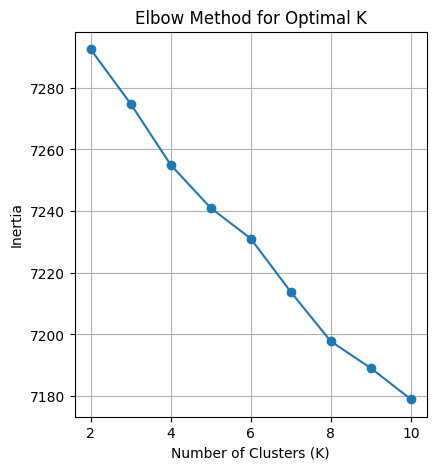

In [194]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()

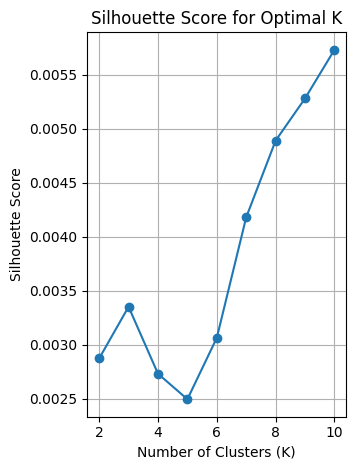

In [195]:
# Plotting the Silhouette Score graph
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid()

plt.tight_layout()
plt.show()

In [196]:
# Choosing the best K based on the Elbow Method or Silhouette Score:

best_k = 10

# Training the KMeans model with the best K value
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(modified_x)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


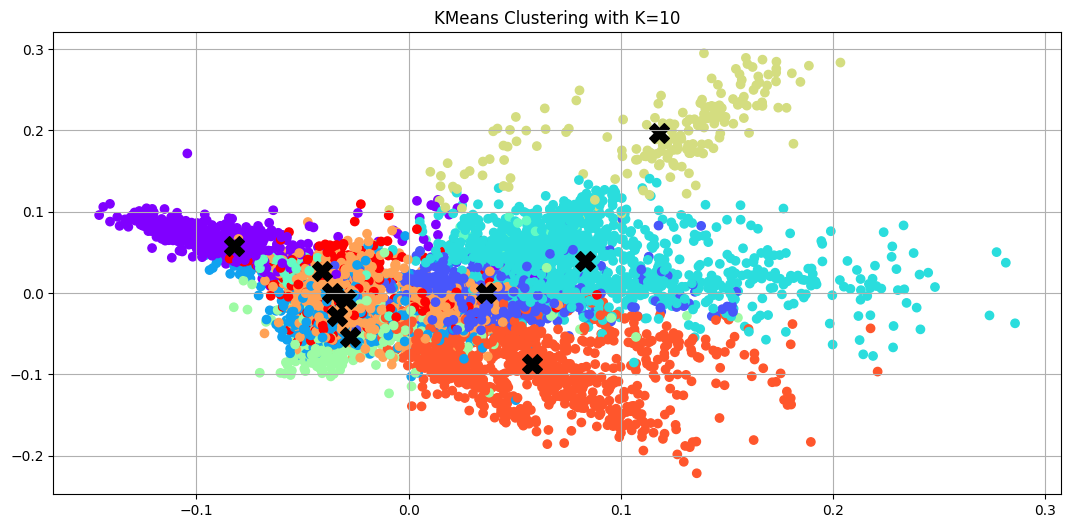

In [197]:
# Setting up figure size:

plt.figure(figsize=(13,6))

# Visualization of the clustered data
plt.scatter(modified_x[:, 0], modified_x[:, 1], c=labels, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='black')
plt.title(f'KMeans Clustering with K={best_k}')
plt.grid()
plt.show()

<ipython-input-198-1a64d93df3f9>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(modified_x[labels == cluster_label, 0],


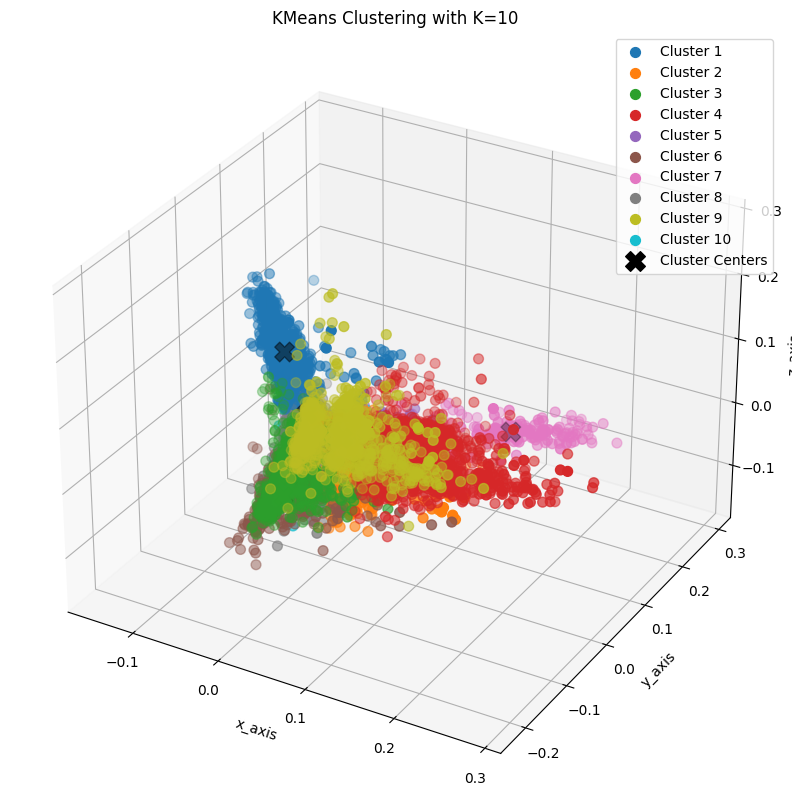

In [198]:
# 3D Visualization of the clustered data
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in range(best_k):
    ax.scatter(modified_x[labels == cluster_label, 0],
               modified_x[labels == cluster_label, 1],
               modified_x[labels == cluster_label, 2],
               label=f'Cluster {cluster_label + 1}', cmap='rainbow', s=50)

# Scatter plot for cluster centers
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2],
           marker='X', s=200, c='black', label='Cluster Centers')

ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_zlabel('z_axis')
ax.set_title(f'KMeans Clustering with K={best_k}')
ax.legend()

plt.show()

In [199]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**KMeans Clustering:**

KMeans is an unsupervised machine learning algorithm used for clustering data into K clusters. It aims to partition data points into K clusters, where each data point belongs to the cluster with the nearest mean (centroid). The algorithm iteratively assigns data points to the nearest cluster and then recalculates the centroids based on the data points in each cluster. This process continues until the centroids no longer change significantly or a specified number of iterations is reached.

**Algorithm Steps:**

1. Initialize K centroids randomly.
2. Assign each data point to the nearest centroid to form K clusters.
3. Recalculate the centroids based on the data points in each cluster.
4. Repeat steps 2 and 3 until the centroids converge or a maximum number of iterations is reached.

**Performance Evaluation using Evaluation Metric Score Chart**:

In clustering, there are some evaluation metrics that can be used to assess the quality of clustering results. Two common evaluation metrics for KMeans clustering are:

**Inertia**: Inertia measures the sum of squared distances of samples to their closest cluster center (centroid). Lower inertia indicates better clustering, as it means data points are closer to their respective cluster centers.

**Silhouette Score**: Silhouette Score measures how well-separated the clusters are. It ranges from -1 to 1, where higher values indicate better-defined and well-separated clusters.

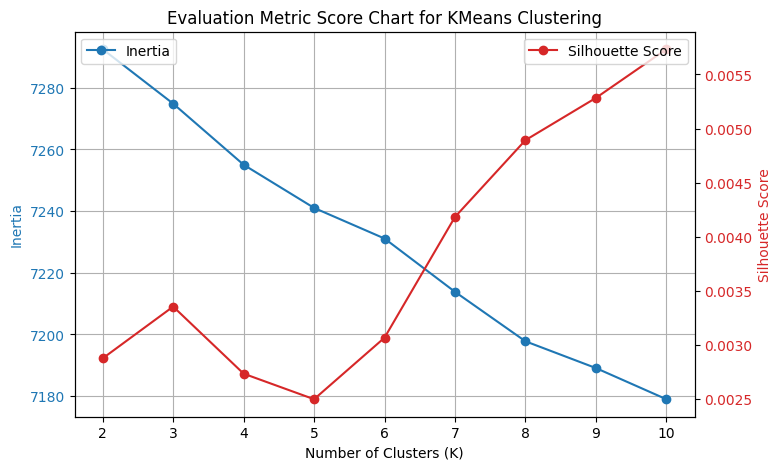

In [200]:
# Visualizing evaluation Metric Score chart
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plotting the Inertia values on the left y-axis (ax1)
ax1.plot(k_values, inertia_values, marker='o', color='tab:blue')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia', color='tab:blue')
ax1.set_title('Evaluation Metric Score Chart for KMeans Clustering')
ax1.grid()

# Creating a secondary y-axis on the right (ax2) for Silhouette Score
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, marker='o', color='tab:red')
ax2.set_ylabel('Silhouette Score', color='tab:red')

# Adding legend and setting colors for each plot
ax1.legend(['Inertia'], loc='upper left')
ax2.legend(['Silhouette Score'], loc='upper right')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.show()

In [201]:
# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

In [204]:
# Building a wordcloud for the movie descriptions
def k_cloud(num):
  comment_words = ''
  sw = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['kmeans_cluster']==num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = sw,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)


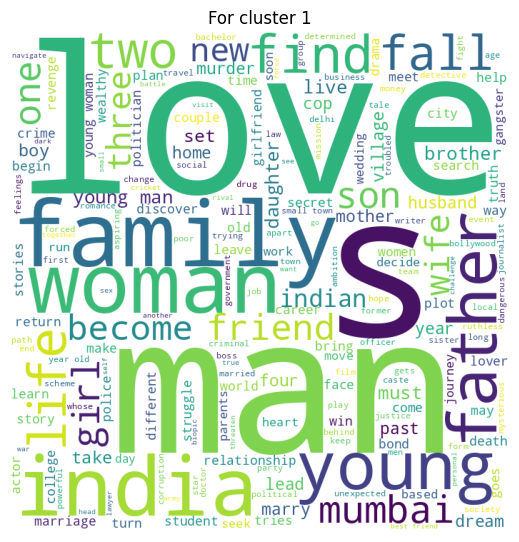

**********************************************************************
**********************************************************************
**********************************************************************


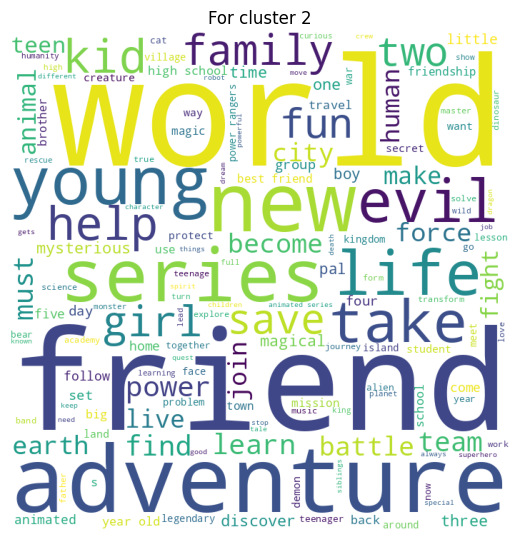

**********************************************************************
**********************************************************************
**********************************************************************


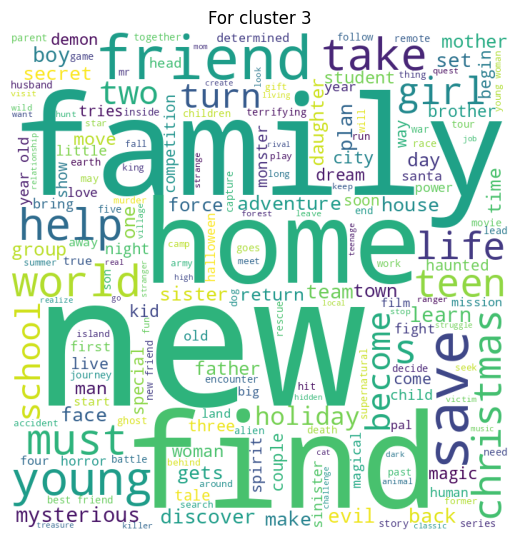

**********************************************************************
**********************************************************************
**********************************************************************


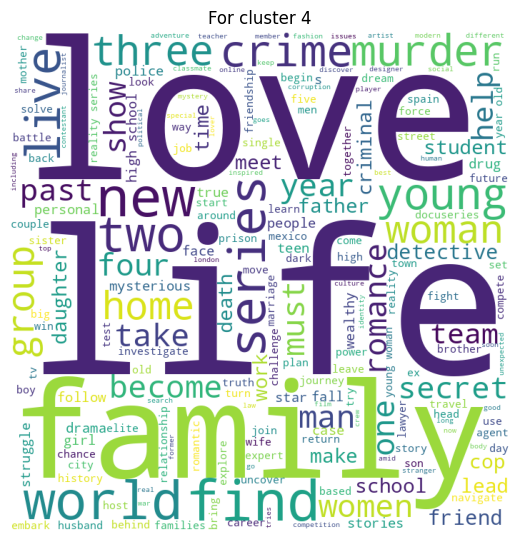

**********************************************************************
**********************************************************************
**********************************************************************


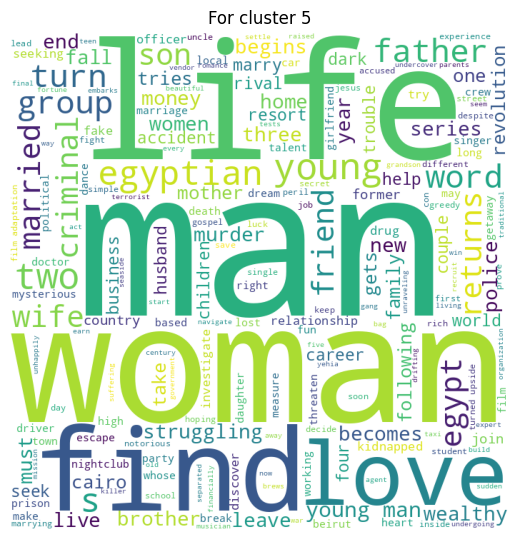

**********************************************************************
**********************************************************************
**********************************************************************


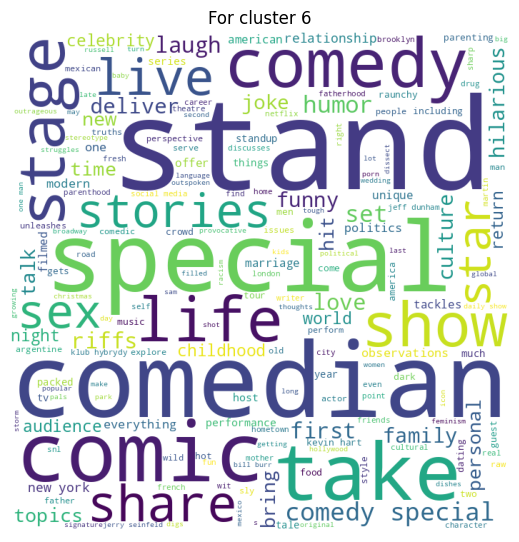

**********************************************************************
**********************************************************************
**********************************************************************


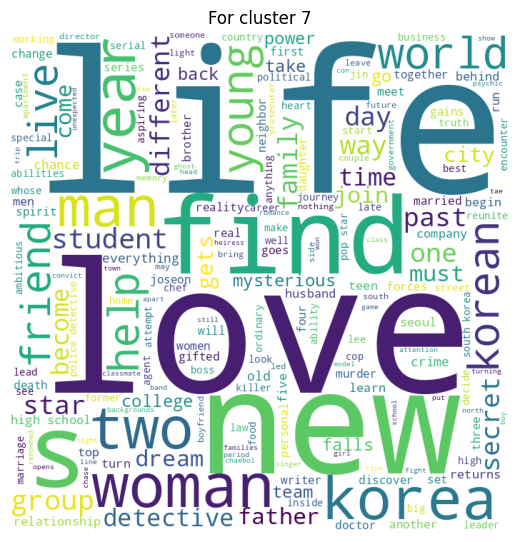

**********************************************************************
**********************************************************************
**********************************************************************


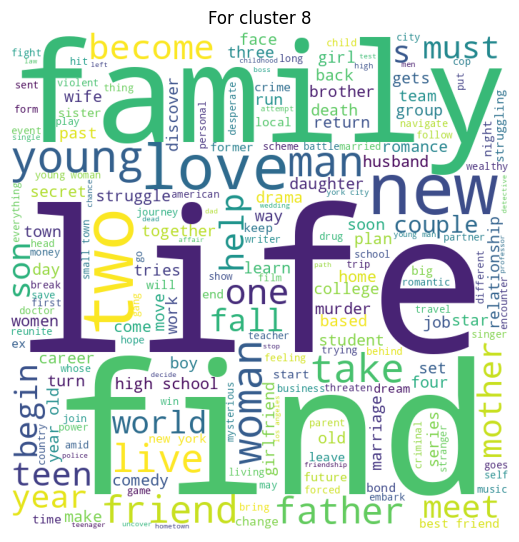

**********************************************************************
**********************************************************************
**********************************************************************


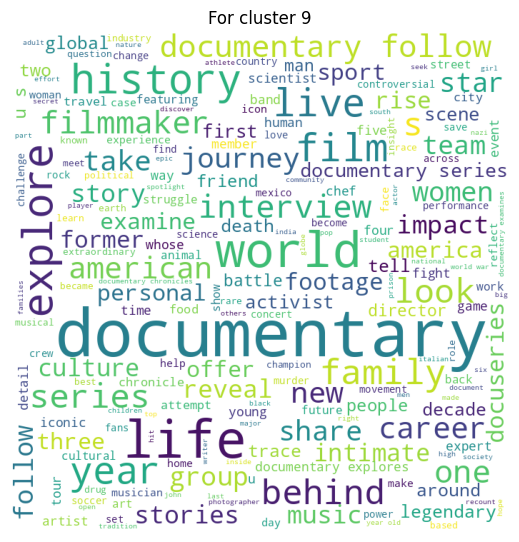

**********************************************************************
**********************************************************************
**********************************************************************


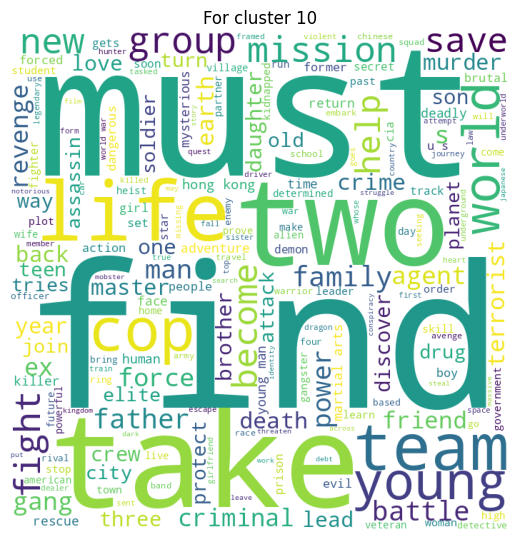

**********************************************************************
**********************************************************************
**********************************************************************


In [205]:
# Creating a for loop to create word cloud:

for i in range(0,10):
  k_cloud(i)
  plt.title(f'For cluster {i+1}')
  plt.show()
  print("*"*70)
  print("*"*70)
  print("*"*70)

### ML Model - 2 (Hierarchial Clustering)

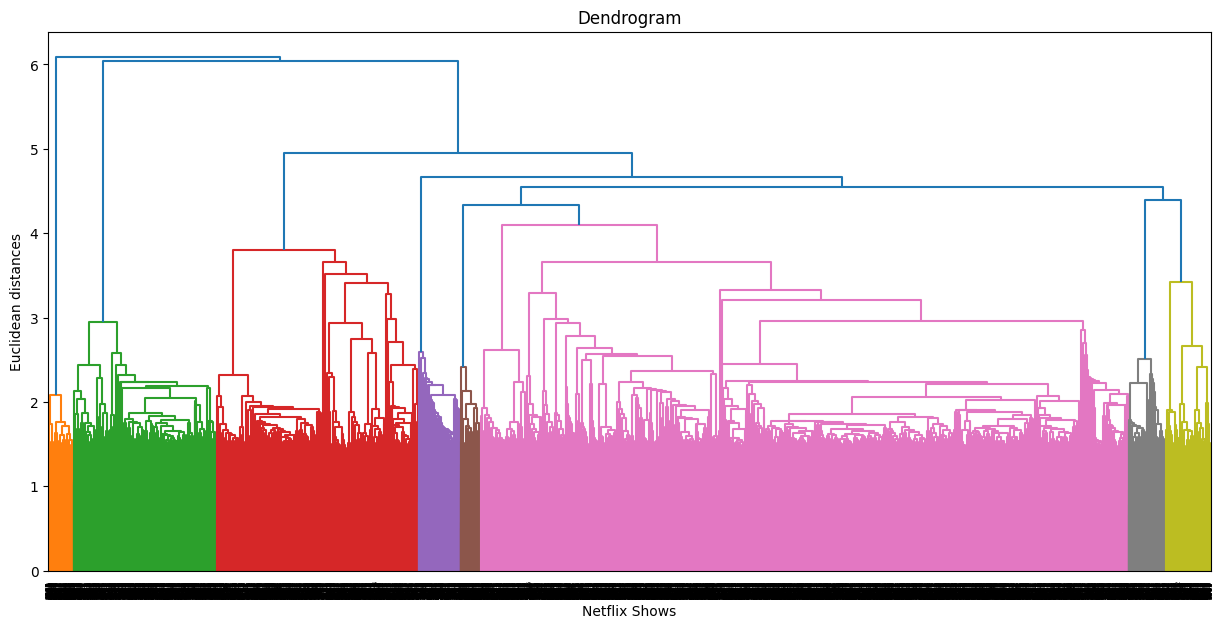

In [82]:
# Importing the shc module for dendrogram
import scipy.cluster.hierarchy as shc

# Building a dendrogram to decide on the number of clusters
plt.figure(figsize=(15, 7))
dend = shc.dendrogram(shc.linkage(modified_x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Euclidean distances')
plt.show()

**Explaination**:

A dendrogram is a diagram resembling a tree, which showcases the sequence of merges or splits in a hierarchical clustering process. The vertical lines in the dendrogram indicate the distance between the clusters, and the longer the lines, the greater the distance between the clusters. By analyzing the dendrogram, we can identify the optimal number of clusters.

In [ ]:
# Computing Silhouette score for each k

# Importing necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Computing Silhouette score for each value of k
k_range = range(2, 10)
for k in k_range:
    clustering_model = AgglomerativeClustering(n_clusters=k)
    cluster_labels = clustering_model.fit_predict(modified_x)
    score = silhouette_score(modified_x, cluster_labels)
    print(f"For k={k}, Silhouette score={score:.4f}")

For k=2, Silhouette score=0.0008
For k=3, Silhouette score=0.0019
For k=4, Silhouette score=0.0007
For k=5, Silhouette score=-0.0005
For k=6, Silhouette score=0.0001
For k=7, Silhouette score=0.0006
For k=8, Silhouette score=0.0011
For k=9, Silhouette score=0.0016


From above data, we can conclude that 3 is the optimal number of clusters as it has maximum Silhouette score.

#### 2D Plot:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


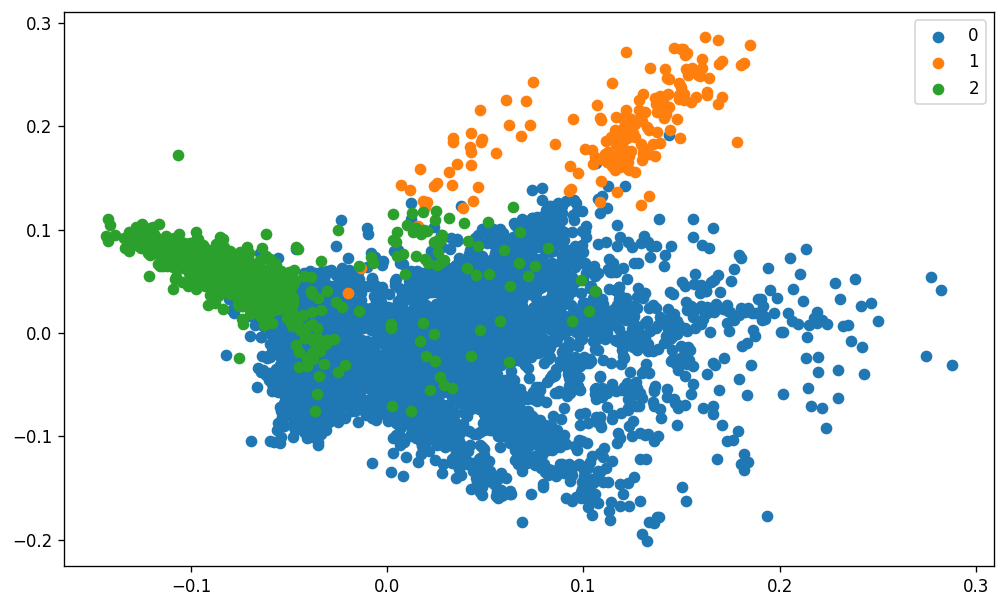

In [85]:
#training the K-means model on a dataset to visualize the clusters.
Agmodel = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(modified_x)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(modified_x[label == i , 0] , modified_x[label == i , 1] , label = i)
plt.legend()
plt.show()

#### 3D Plot:

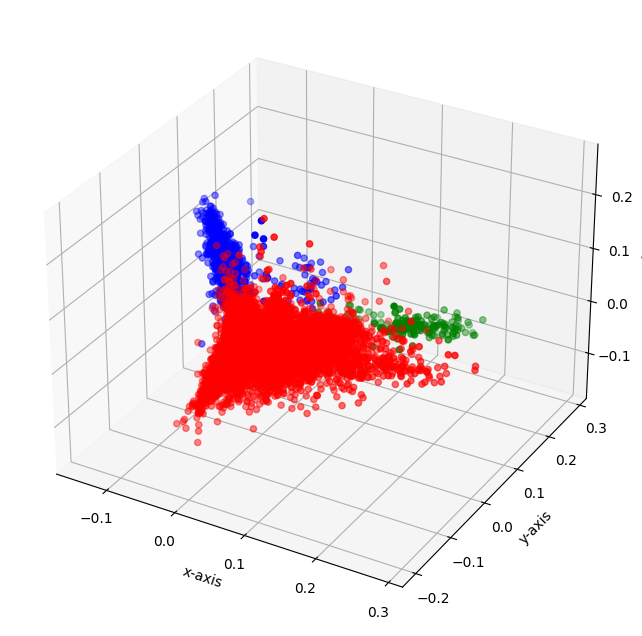

In [86]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(modified_x[Agmodel.labels_ == i, 0], modified_x[Agmodel.labels_ == i, 1], modified_x[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [88]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = Agmodel.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Hierarchical clustering** is a popular technique used in unsupervised machine learning for grouping similar data points into clusters. It builds a tree-like hierarchical representation of the data, also known as a dendrogram. The main idea behind hierarchical clustering is to iteratively merge individual data points or existing clusters into larger clusters, creating a hierarchy of clusters with varying levels of granularity.

**There are two main types of hierarchical clustering:**

1. **Agglomerative Hierarchical Clustering**: It is a "bottom-up" approach where each data point starts as its own cluster, and then pairs of clusters are successively merged until all data points belong to a single large cluster.
2. **Divisive Hierarchical Clustering**: It is a "top-down" approach where all data points start in a single cluster, and then clusters are successively split into smaller clusters until each data point is in its own cluster.

**Here's a step-by-step explanation of the agglomerative hierarchical clustering algorithm:**

1. Start by considering each data point as its own cluster.
2. Compute the distance (similarity) between each pair of clusters. The choice of distance metric (e.g., Euclidean distance, Manhattan distance) depends on the type of data and the problem at hand.
3. Merge the two closest clusters into a single cluster. The distance between clusters can be based on single-linkage, complete-linkage, or average-linkage criteria.
a. Single-linkage: The distance between two clusters is the distance between their closest data points.
b. Complete-linkage: The distance between two clusters is the distance between their farthest data points.
c. Average-linkage: The distance between two clusters is the average distance between all pairs of data points, one from each cluster.
4. Repeat steps 2 and 3 until all data points belong to a single cluster or until a predefined number of clusters are obtained.
5. At each step, create a dendrogram to visualize the hierarchy of clusters. The y-axis of the dendrogram represents the distance between clusters at each step of merging.

The advantage of hierarchical clustering is that it provides an interpretable representation of data clustering, allowing users to identify clusters at different levels of granularity. By cutting the dendrogram at a particular level, you can obtain a specific number of clusters based on your problem's requirements.

In [89]:
# Visualizing evaluation Metric Score chart

# Building a wordcloud for the movie descriptions
def hier_cloud(num):
  comment_words = ''
  sw = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['hierarchical_cluster']==num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = sw,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

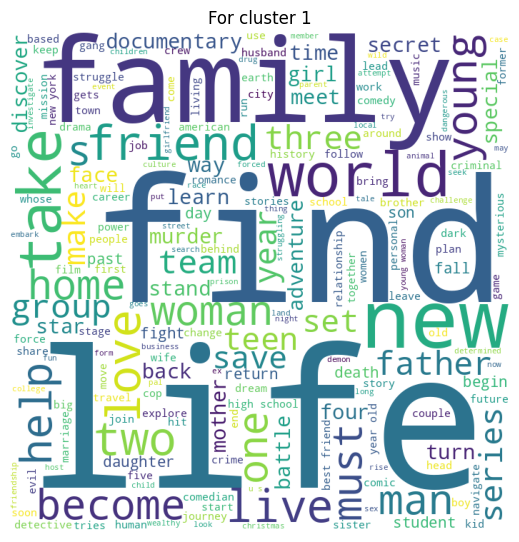

**********************************************************************
**********************************************************************
**********************************************************************


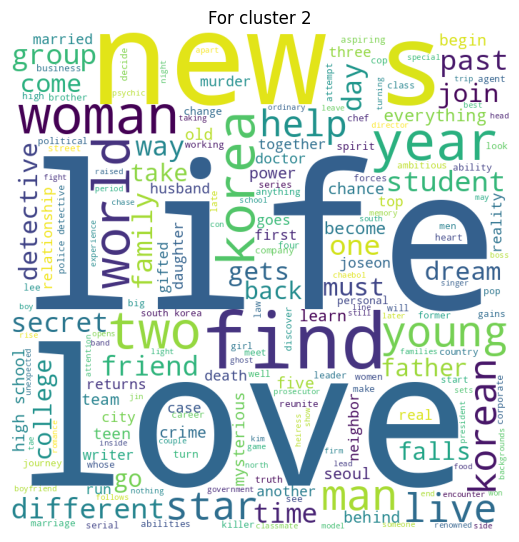

**********************************************************************
**********************************************************************
**********************************************************************


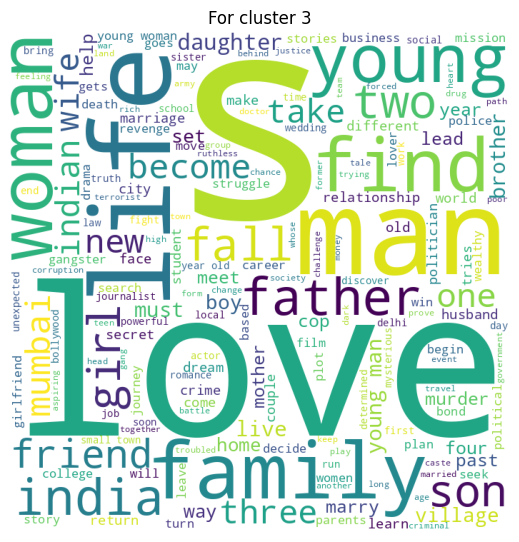

**********************************************************************
**********************************************************************
**********************************************************************


In [91]:
# Creating a for loop to create word cloud:

for i in range(0,3):
  hier_cloud(i)
  plt.title(f'For cluster {i+1}')
  plt.show()
  print("*"*70)
  print("*"*70)
  print("*"*70)

### ML Model - 3 - DBSCAN Clustering

In [99]:
# ML Model - 3 Implementation

from sklearn.cluster import DBSCAN


# Create a DBSCAN clustering model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the data
dbscan.fit(modified_x)

# Get the cluster assignments for each data point
cluster_labels = dbscan.labels_

# Get the number of clusters (excluding noise points, labeled as -1)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Get the indices of the core samples (non-noise points)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Print the results
print("DBSCAN Clustering Results:")
print(f"Number of clusters: {num_clusters}")
print(f"Cluster labels: {cluster_labels}")
print(f"Core samples: {core_samples_mask}")

DBSCAN Clustering Results:
Number of clusters: 0
Cluster labels: [-1 -1 -1 ... -1 -1 -1]
Core samples: [False False False ... False False False]


#### 2D Plot

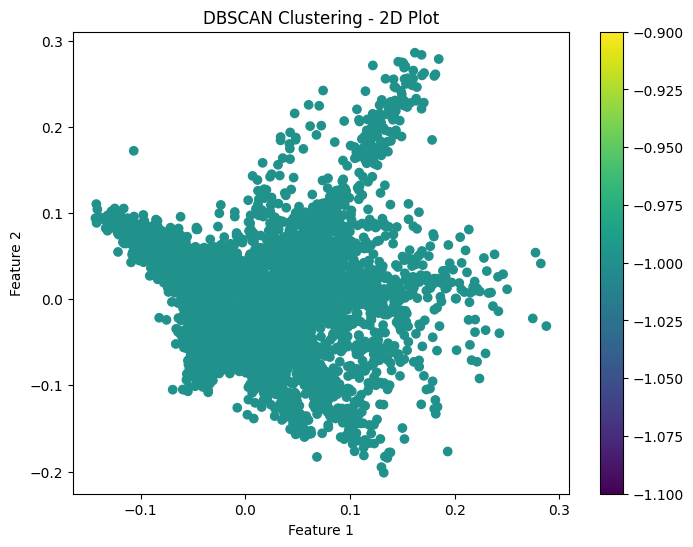

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(modified_x[:, 0], modified_x[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering - 2D Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

As the number of clusters obtained by the DBSCAN algorithm is 0, it means that all data points are considered noise points, and no clusters are formed. This can happen if the DBSCAN algorithm is not able to find dense regions or groups of data points within the given epsilon (eps) and minimum samples (min_samples) parameters.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Opted for the Silhouette Score as our evaluation metric instead of the Distortion Score (also known as inertia or sum of squared distances) because it provides a more comprehensive measure of how well each data point in a cluster is separated from other clusters. The Silhouette Score ranges from -1 to 1, where higher values indicate better cluster separation. A score close to 1 implies that the data point fits well within its cluster but poorly with neighboring clusters. A score close to 0 suggests that the data point lies on or near the boundary between two clusters, and a score close to -1 indicates a possible misassignment to the wrong cluster.

The advantages of using the Silhouette Score over the Distortion Score are as follows:

1. Silhouette Score accounts for both cohesion (how similar data points are within a cluster) and separation (how dissimilar data points in different clusters are). In contrast, Distortion Score only considers the compactness of each cluster.

2. Silhouette Score is less sensitive to the shape of the clusters. Distortion Score tends to favor spherical clusters, but in our case, the clusters are not entirely spherical.

3. Silhouette Score provides more intuitive and interpretable results. Instead of assigning a single value for the entire clustering solution, it assigns a score to each data point, giving us a more granular understanding of the clustering quality.

###2. Which ML model did you choose from the above created models as your final prediction model and why?

Considered K Means Clustering model as the final prediction model as it is providing better **Silhoutte Score** than Heirarchical Clustering model. Also the K Means clustering model is giving 10 clusters which means it is better in identifing the characteristics of data points compared to Hierarchical Clustering model which is giving 3 clusters as optimal.

## ***8.*** ***Content Based Recommender System***

A Content-Based Recommender System is a type of recommendation system used in various applications, such as e-commerce, online media, and information retrieval. Its primary purpose is to recommend items (e.g., products, articles, movies, music) to users based on the characteristics or content of the items themselves and the preferences expressed by the user. The system analyzes the features or attributes of the items and matches them to the user's preferences or historical interactions.

In this project, utilizing Cosine similarity as a metric to assess the similarity between two non-zero vectors in a multidimensional space. It calculates the cosine of the angle formed by the vectors, resulting in a range from -1 (opposite direction) to 1 (same direction), with 0 signifying orthogonality (the vectors are perpendicular).

The purpose of using Cosine similarity is to determine the similarity between two documents or pieces of text. We represent the documents as vectors in a high-dimensional space, where each dimension corresponds to a word or term in the corpus. By computing the Cosine similarity between these vectors, we can gauge the level of similarity between the documents based on their word usage.

I opt for Cosine similarity over tf-idf for the following reasons:

Cosine similarity is more adept at handling high-dimensional sparse data. It captures the semantic meaning of the text better than tf-idf. Even if two items contain similar words but in different orders, Cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the word frequency in a document and disregards their order or meaning.

In [206]:
# Importing required libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tf_idf = TfidfVectorizer(stop_words='english')
tf_idf_matrix = tf_idf.fit_transform(df['textual_data'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tf_idf_matrix)

In [207]:
# creating a function to use cosine similarity matrix for prediction of similar type of contents over an input:

def recommend(title, cosine_sim=cosine_sim, data=df):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendations', 'Similarity_score'])

    return rec_table

In [208]:
# Testing the Recommender System on random movie:
recommend('Chashme Baddoor')

Recommendations  Similarity_score
0          Chashme Buddoor            0.9125
1                   Judwaa            0.1763
2            Kal Ho Naa Ho            0.1724
3                 Judwaa 2            0.1672
4          Rang De Basanti            0.1516
5     Haseena Maan Jaayegi            0.1407
6           Dil Chahta Hai            0.1301
7  Jaane Tu... Ya Jaane Na            0.1289
8      Hum Aapke Hain Koun            0.1284
9             Dear Zindagi            0.1204

In [209]:
# Testing the Recommender System on random show:
recommend('Sadqay Tumhare')

Recommendations  Similarity_score
0            Dukhtar            0.1646
1               Moor            0.1628
2      Pinky Memsaab            0.1582
3  7 Din Mohabbat In            0.1453
4             Janaan            0.1375
5             Khaani            0.1329
6           Humsafar            0.1282
7          Wrong No.            0.1202
8     Dil Chahta Hai            0.1143
9      Chupan Chupai            0.1060

# **Conclusion**

#### EDA:

1. The dataset contains a higher number of movies (5372, 69.1%) compared to TV shows (2398, 30.9%). This indicates that movies are more prevalent in the dataset than TV shows.
2. The higher count of movies suggests that the dataset may have a more diverse range of movies available for analysis compared to TV shows.
3. TV-MA, TV-14 and TV-PG ratings' movies have the highest counts which indiciates that movies and shows are mostly focused to these ratings.
4. Most of the contents were primarily made in USA, India and United Kingdom.
5. In top content producing countries, movies count is almost double than TV Shows.
6. Most movies were released in 2017, 2018 and 2019 years.
7. Movies growth was significant in the decade of 2010.
8. Most movies are in the range from 80-130 minutes.
9. Most of the shows has only one season.
10. Count of Season wise shows in reducing as the number of seasons reduce.
11. Movies shoot in Croatia has the highest average duration.

#### ML Model:

1. Considered K Means Clustering model as the final prediction model as it is providing better Silhoutte Score than Heirarchical Clustering model. Also the K Means clustering model is giving 10 clusters which means it is better in identifing the characteristics of data points compared to Hierarchical Clustering model which is giving 3 clusters as optimal.

2. Also built a Content Based Movie Recommender System which is successfully able to recommend the top 10 similary type of content based on provided input.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***